In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import scipy as sp
import pandas as pd
import seaborn
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [2]:
num_clusters = 20

In [3]:
dataset = fetch_20newsgroups(subset='all') # Fetch the entire dataset
print("Number of total posts: %i" % len(dataset.filenames)) # Code from textbook

Number of total posts: 18846


In [4]:
train_data = fetch_20newsgroups(subset='train', 
                                random_state=42,
                                remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test',
                               random_state=42,
                               remove=('headers', 'footers', 'quotes'))

In [5]:
test_labels, train_labels = test_data.target, train_data.target

In [48]:
#test_data.data

In [7]:
# Make a dataframe object for training and testing data.  Labels correspond to the 20 different
# news groups
train = {'Labels': train_labels, 'Posts': train_data.data}
train_df = pd.DataFrame(data=train)
train_df

,Labels,Posts
0,7,I was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh..."
3,1,\nDo you have Weitek's address/phone number? ...
4,14,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...,...
11309,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,4,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,3,I just installed a DX2-66 CPU in a clone mothe...
11312,1,\nWouldn't this require a hyper-sphere. In 3-...


In [8]:
test = {'Labels': test_labels, 'Posts': test_data.data}
test_df = pd.DataFrame(data=test) 
test_df

,Labels,Posts
0,7,I am a little confused on all of the models of...
1,5,I'm not familiar at all with the format of the...
2,0,"\nIn a word, yes.\n"
3,17,\nThey were attacking the Iraqis to drive them...
4,19,\nI've just spent two solid months arguing tha...
...,...,...
7527,14,"\n Henry, if I read you correctly, you may b..."
7528,4,"about\nthem on\n\nActually, I thought Macs wer..."
7529,9,"I sent a version of this post out a while ago,..."
7530,6,I have this kit which includes the following :...


In [9]:
# Need to use stemming to count words that have similar meaning by comparing their stems
english_stemmer =nltk.stem.SnowballStemmer('english')

In [10]:
#Class to convert text to a bag-of-words vector of counts using sklearn CountVectorizer
# Note: tfidf stands for term frequency - inverse document frequency.  This is helpful for
# de-noising the data i.e. penalizing words that occur in many posts, while focusing more 
# on words that occur often in fewer posts.  
class StemmedTfidfVectorizer(TfidfVectorizer):
    '''This code comes from the Richert textbook code'''
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [11]:
vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', 
                                    decode_error='ignore')
vectorized_train = vectorizer.fit_transform(train_df['Posts'])

In [12]:
kmeans20 = KMeans(n_clusters=20,
                  n_init = 1,
                  verbose = 1,
                  random_state=3)

In [13]:
clustered = kmeans20.fit(vectorized_train)

Initialization complete
Iteration 0, inertia 20275.350894665367
Iteration 1, inertia 10606.005701327698
Iteration 2, inertia 10531.986490986359
Iteration 3, inertia 10503.931641830399
Iteration 4, inertia 10484.342239000474
Iteration 5, inertia 10463.024699220707
Iteration 6, inertia 10454.963425144755
Iteration 7, inertia 10452.88727829309
Iteration 8, inertia 10451.620292465726
Iteration 9, inertia 10450.574894556548
Iteration 10, inertia 10449.832414549634
Iteration 11, inertia 10449.461809767145
Iteration 12, inertia 10449.268513207577
Iteration 13, inertia 10449.129699250796
Iteration 14, inertia 10449.026961379708
Iteration 15, inertia 10448.929275823364
Iteration 16, inertia 10448.827296710437
Iteration 17, inertia 10448.731916217299
Iteration 18, inertia 10448.61463557733
Iteration 19, inertia 10448.499633309822
Iteration 20, inertia 10448.369545646645
Iteration 21, inertia 10448.260514328425
Iteration 22, inertia 10448.178061346089
Iteration 23, inertia 10448.076345860343
Iter

In [14]:
kmeans20.labels_.shape

(11314,)

[Text(0.5, 1.0, 'Bar Chart for K=20 Clusters'), Text(0.5, 0, 'Cluster')]

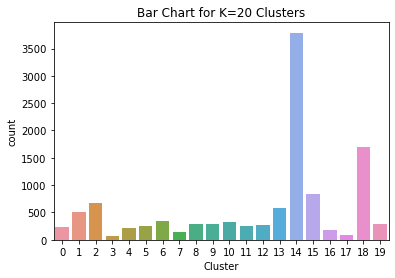

In [15]:
seaborn.countplot(x=kmeans20.labels_).set(title='Bar Chart for K=20 Clusters', xlabel='Cluster')

In [16]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, kmeans20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, kmeans20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, kmeans20.labels_))
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(train_labels, kmeans20.labels_))
print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(train_labels, kmeans20.labels_))
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(vectorized_train, train_labels, sample_size=1000)))

Homogeneity: 0.289
Completeness: 0.361
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.317
Silhouette Coefficient: -0.014


In [17]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

next_post = \
"""Looking for an Indian motorbike in mint condition.  I want it like new, with
big tires and a comfortable seat.  I am willing to pay thirty dollars for 
this ride.  Help me out?"""

last_post = \
"""Do atheists believe in God?"""

In [18]:
new_post_vector = vectorizer.transform([new_post])
new_post_label = kmeans20.predict(new_post_vector)[0]

In [19]:
similar_indices = (kmeans20.labels_ == new_post_label).nonzero()[0]

In [20]:
similar_indices

array([    7,    24,   184,   259,   302,   337,   426,   518,   662,
         831,   838,   842,   859,  1040,  1108,  1143,  1194,  1376,
        1415,  1426,  1465,  1466,  1524,  1544,  1546,  1585,  1639,
        1670,  1678,  1690,  1709,  1792,  1806,  1913,  1929,  1966,
        1983,  1993,  2011,  2074,  2129,  2155,  2164,  2198,  2202,
        2217,  2229,  2258,  2293,  2323,  2325,  2378,  2535,  2563,
        2579,  2635,  2646,  2700,  2704,  2726,  2734,  2757,  2866,
        2879,  2880,  2881,  2896,  2949,  2981,  2986,  3017,  3027,
        3035,  3103,  3148,  3188,  3245,  3375,  3390,  3457,  3522,
        3526,  3546,  3554,  3585,  3632,  3635,  3645,  3679,  3725,
        3772,  3815,  3847,  3877,  3918,  3922,  3948,  3961,  4026,
        4058,  4091,  4244,  4267,  4334,  4370,  4398,  4402,  4488,
        4519,  4536,  4572,  4667,  4673,  4676,  4726,  4754,  4755,
        4817,  4882,  4926,  4927,  5046,  5055,  5077,  5092,  5179,
        5192,  5194,

In [21]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i]))   

In [22]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 264
=== #1 ===
(0.9491516479437525, "Hi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n+-------------------------------------------------------------------+\n")

=== #2 ===
(1.1648513597785446, "My computer won't recognise my disk after a reboot (Windows crash - Grrr!!)\nAre there any 

In [23]:
next_post_vector = vectorizer.transform([next_post])
next_post_label = kmeans20.predict(next_post_vector)[0]

In [24]:
similar_indices = (kmeans20.labels_ == next_post_label).nonzero()[0]

In [25]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((next_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i]))   

In [26]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 3789
=== #1 ===
(0.9999999999999998, '')

=== #2 ===
(1.3508611459915927, 'Do you realize that the yankees are paying Matt Nokes 2,500,000 dollars  \nthis year!!!! GEESH. And Maas only gets 125,000.    \n\n\n\nBy the way, the yankees are going to WIN IT ALL\n\n\nYankees are the BEST.\n\n')

=== #3 ===
(1.414213562373095, '\n\n     You\'re right, I bailed out in Diff Eq.  Nevertheless, I would \n     suggest to YOU that there is a difference between a "proposed BILL,\n     stalled in Congress" and a "executive order, crammed down OUR \n     THROATS".   Do you disagree?\n\n\n\n        Went to the Post Office on Friday, got my passport apps in.')
=== #4 ===
(1.4142135623730951, "this week's autoweek talks about how wagons are getting back in vogue.\ni wouldn't mind an audi s4 wagon (great stealth value) but you'll\nnever catch me dead in a minivan!\n")


In [27]:
last_post_vector = vectorizer.transform([last_post])
last_post_label = kmeans20.predict(last_post_vector)[0]

In [28]:
similar_indices = (kmeans20.labels_ == last_post_label).nonzero()[0]

In [29]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((last_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i])) 

In [30]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 335
=== #1 ===
(0.8504556061851828, 'Archive-name: atheism/introduction\nAlt-atheism-archive-name: introduction\nLast-modified: 5 April 1993\nVersion: 1.2\n\n-----BEGIN PGP SIGNED MESSAGE-----\n\n                          An Introduction to Atheism\n                       by mathew <mathew@mantis.co.uk>\n\nThis article attempts to provide a general introduction to atheism.  Whilst I\nhave tried to be as neutral as possible regarding contentious issues, you\nshould always remember that this document represents only one viewpoint.  I\nwould encourage you to read widely and draw your own conclusions; some\nrelevant books are listed in a companion article.\n\nTo provide a sense of cohesion and progression, I have presented this article\nas an imaginary conversation between an atheist and a theist.  All the\nquestions asked by the imaginary theist are questions which have been cropped\nup repeatedly on alt.atheism since the newsgroup was created.  Some other\nfrequently asked

In [31]:
# Now, vectorize the testing data and make predictions using the model
vectorized_test = vectorizer.fit_transform(test_df['Posts'])

In [32]:
predictions = kmeans20.fit_predict(vectorized_test)

Initialization complete
Iteration 0, inertia 13504.44289517812
Iteration 1, inertia 7050.615511347436
Iteration 2, inertia 7003.956818918635
Iteration 3, inertia 6976.538907012739
Iteration 4, inertia 6963.132844488498
Iteration 5, inertia 6955.587727743977
Iteration 6, inertia 6950.477587875871
Iteration 7, inertia 6946.635231762967
Iteration 8, inertia 6944.129421705204
Iteration 9, inertia 6941.633433423807
Iteration 10, inertia 6939.278838206142
Iteration 11, inertia 6937.071863479853
Iteration 12, inertia 6934.767971517593
Iteration 13, inertia 6933.829341425008
Iteration 14, inertia 6933.2436379661885
Iteration 15, inertia 6932.754054207489
Iteration 16, inertia 6932.248169098833
Iteration 17, inertia 6931.595686906022
Iteration 18, inertia 6931.102096668499
Iteration 19, inertia 6930.825599181732
Iteration 20, inertia 6930.615873603262
Iteration 21, inertia 6930.425951406564
Iteration 22, inertia 6930.194554582614
Iteration 23, inertia 6930.0755723831035
Iteration 24, inertia 69

In [33]:
adjusted_rand_score(test_df['Labels'], predictions)

0.07699899231187098

In [34]:
# Now, do a KMeans clustering with k=20 clusters, but normalizing the white space of the input data and smashing everything
# to lower case

In [35]:
def normalize_whitespace(txt):
    if '\n' in txt: txt = txt.replace('\n', ' ')
    if '\t' in txt: txt = txt.replace('\t', ' ')
    return txt

In [36]:
column = train_df['Posts'].values # returns an array of the posts in the train dataframe
new_column, new_post = [], '', 
for post in column: 
    new_post = normalize_whitespace(post)
    new_column.append(new_post.lower())
train_df['Normalized Posts'] = new_column

In [37]:
train_df

,Labels,Posts,Normalized Posts
0,7,I was wondering if anyone out there could enli...,i was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...,a fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh...","well folks, my mac plus finally gave up the gh..."
3,1,\nDo you have Weitek's address/phone number? ...,do you have weitek's address/phone number? i...
4,14,"From article <C5owCB.n3p@world.std.com>, by to...","from article <c5owcb.n3p@world.std.com>, by to..."
...,...,...,...
11309,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn> from: nyeda@cnsvax.uwec.edu (david nye) dn...
11310,4,"I have a (very old) Mac 512k and a Mac Plus, b...","i have a (very old) mac 512k and a mac plus, b..."
11311,3,I just installed a DX2-66 CPU in a clone mothe...,i just installed a dx2-66 cpu in a clone mothe...
11312,1,\nWouldn't this require a hyper-sphere. In 3-...,wouldn't this require a hyper-sphere. in 3-s...


In [38]:
column = test_df['Posts'].values
new_column, new_post = [], ''
for post in column:
    new_post = normalize_whitespace(post)
    new_column.append(new_post.lower())
test_df['Normalized Posts'] = new_column

In [39]:
test_df

,Labels,Posts,Normalized Posts
0,7,I am a little confused on all of the models of...,i am a little confused on all of the models of...
1,5,I'm not familiar at all with the format of the...,i'm not familiar at all with the format of the...
2,0,"\nIn a word, yes.\n","in a word, yes."
3,17,\nThey were attacking the Iraqis to drive them...,they were attacking the iraqis to drive them ...
4,19,\nI've just spent two solid months arguing tha...,i've just spent two solid months arguing that...
...,...,...,...
7527,14,"\n Henry, if I read you correctly, you may b...","henry, if i read you correctly, you may be..."
7528,4,"about\nthem on\n\nActually, I thought Macs wer...","about them on actually, i thought macs were s..."
7529,9,"I sent a version of this post out a while ago,...","i sent a version of this post out a while ago,..."
7530,6,I have this kit which includes the following :...,i have this kit which includes the following :...


In [40]:
norm_vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                         stop_words='english', 
                                         decode_error='ignore')
norm_vectorized_train = vectorizer.fit_transform(train_df['Normalized Posts'])
num_samples, num_features = norm_vectorized_train.shape
print(f"#samples: {num_samples} and #features: {num_features}.")

#samples: 11314 and #features: 7824.


In [41]:
norm_kmeans20 = KMeans(n_clusters=20,
                     n_init = 1,
                     verbose = 1,
                     random_state=3)

In [42]:
norm_clustered = norm_kmeans20.fit(norm_vectorized_train)

Initialization complete
Iteration 0, inertia 20275.350894665367
Iteration 1, inertia 10606.005701327698
Iteration 2, inertia 10531.986490986359
Iteration 3, inertia 10503.931641830399
Iteration 4, inertia 10484.342239000474
Iteration 5, inertia 10463.024699220707
Iteration 6, inertia 10454.963425144755
Iteration 7, inertia 10452.88727829309
Iteration 8, inertia 10451.620292465726
Iteration 9, inertia 10450.574894556548
Iteration 10, inertia 10449.832414549634
Iteration 11, inertia 10449.461809767145
Iteration 12, inertia 10449.268513207577
Iteration 13, inertia 10449.129699250796
Iteration 14, inertia 10449.026961379708
Iteration 15, inertia 10448.929275823364
Iteration 16, inertia 10448.827296710437
Iteration 17, inertia 10448.731916217299
Iteration 18, inertia 10448.61463557733
Iteration 19, inertia 10448.499633309822
Iteration 20, inertia 10448.369545646645
Iteration 21, inertia 10448.260514328425
Iteration 22, inertia 10448.178061346089
Iteration 23, inertia 10448.076345860343
Iter

In [43]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, norm_kmeans20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, norm_kmeans20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, norm_kmeans20.labels_))
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(train_labels, norm_kmeans20.labels_))
print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(train_labels, norm_kmeans20.labels_))
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(norm_vectorized_train, train_labels, sample_size=1000)))

Homogeneity: 0.289
Completeness: 0.361
V-measure: 0.321
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.317
Silhouette Coefficient: -0.007


In [44]:
# Now, vectorize the testing data and make predictions using the model
norm_vectorized_test = vectorizer.fit_transform(test_df['Normalized Posts'])

In [45]:
norm_predictions = norm_kmeans20.fit_predict(norm_vectorized_test)

Initialization complete
Iteration 0, inertia 13504.44289517812
Iteration 1, inertia 7050.615511347436
Iteration 2, inertia 7003.956818918635
Iteration 3, inertia 6976.538907012739
Iteration 4, inertia 6963.132844488498
Iteration 5, inertia 6955.587727743977
Iteration 6, inertia 6950.47758787587
Iteration 7, inertia 6946.635231762967
Iteration 8, inertia 6944.129421705204
Iteration 9, inertia 6941.633433423807
Iteration 10, inertia 6939.278838206142
Iteration 11, inertia 6937.071863479853
Iteration 12, inertia 6934.767971517593
Iteration 13, inertia 6933.829341425008
Iteration 14, inertia 6933.2436379661885
Iteration 15, inertia 6932.754054207489
Iteration 16, inertia 6932.248169098833
Iteration 17, inertia 6931.595686906022
Iteration 18, inertia 6931.102096668499
Iteration 19, inertia 6930.825599181732
Iteration 20, inertia 6930.615873603262
Iteration 21, inertia 6930.425951406564
Iteration 22, inertia 6930.194554582614
Iteration 23, inertia 6930.0755723831035
Iteration 24, inertia 693

In [46]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(test_labels, predictions))
print("Completeness: %0.3f" % metrics.completeness_score(test_labels, predictions))

Homogeneity: 0.296
Completeness: 0.355


[Text(0.5, 1.0, 'Bar Chart for Cluster Elements'), Text(0.5, 0, 'Cluster')]

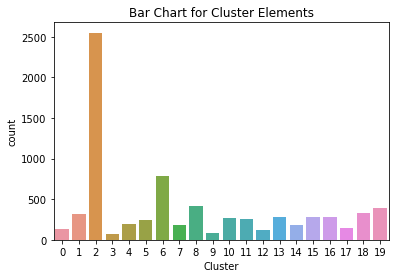

In [47]:
seaborn.countplot(x=norm_predictions).set(title='Bar Chart for Cluster Elements', xlabel='Cluster')